# Pandas

If you've never used `pandas` before, it's amazingly useful, and at times frustrating.

Recommended links: 

 - http://pandas.pydata.org/pandas-docs/stable/gotchas.html
 - https://github.com/dwhitena/blog-content/blob/master/python_pitfalls/Python-Pitfalls.ipynb
 - http://pandas.pydata.org/pandas-docs/stable/cookbook.html

Read through this full series of excellent blog posts by [Tom Augspurger](http://tomaugspurger.github.io/modern-1.html).

High level tip

 - try to represent data in the proper format
   - floats as floats; ints as ints; etc. 
   - Especially if you have dates, or timestamps, or datetimestamps, keep them in that format. 
      
This pdf [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham is an excellent read with a lot that relates to data analysis in any language. 

In [1]:
from __future__ import absolute_import, division, print_function

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_context('poster')
# sns.set_style('whitegrid') 
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

In [3]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import load_boston

### Note

Using cleaned data from [Data Cleaning](Data%20Cleaning.ipynb) Notebook. See Notebook for details.

In [11]:
df = pd.read_csv("../data/coal_prod_cleaned.csv")

## Notebook Extensions -- qgrid

In [23]:
!conda install qgrid -y

Fetching package metadata .........
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/jonathan/miniconda3/envs/py3:
#
qgrid                     0.3.2                    py35_0  


In [5]:
# Check out http://nbviewer.ipython.org/github/quantopian/qgrid/blob/master/qgrid_demo.ipynb for more (including demo)
import qgrid # Put imports at the top
qgrid.nbinstall(overwrite=True)

In [6]:
df.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,102838,4.0,Independent Producer Operator,2712.0,Appalachia Southern,Bibb,Hebron Mine,Alabama,Permanently abandoned,Surface,Birmingham Coal & Coke Company,"2477 Valleydale Rd. S. B3, Birmingham, AL 35244",Mine only,10572.0,NaN,2002
1,103184,5.0,Independent Producer Operator,2480.0,Appalachia Southern,Fayette,Berry Mine,Alabama,Temporarily closed,Surface,Midas Coal Company Incorporate,"401 10th Avenue, S. E, Cullman, AL 35055",Mine only,9725.0,NaN,2002
2,100329,55.0,Operating Subsidiary,123618.0,Appalachia Southern,Jefferson,Concord Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Road, Adger, AL 35006",Preparation Plant,0.0,United Mine Workers of America,2002
3,100851,331.0,Operating Subsidiary,748182.0,Appalachia Southern,Jefferson,Oak Grove Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Rd, Adger, AL 35006",Mine only,1942153.0,United Mine Workers of America,2002
4,102354,28.0,Independent Producer Operator,55306.0,Appalachia Southern,Jefferson,Lindbergh,Alabama,Active,Surface,C & H Mining Company Inc,"P.O. Box 70250, Tuscaloosa, AL 35407",Mine only,168446.0,NaN,2002


In [7]:
qgrid.show_grid(df[['MSHA_ID', 'Year', 'Mine_Name', 'Mine_State', 'Mine_County']], remote_js=True)

In [8]:
%matplotlib inline

In [28]:
%matplotlib notebook

In [12]:
sns.set_context('poster')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

In [7]:
import mpld3

In [31]:
mpld3.enable_notebook()

In [49]:
mpld3.disable_notebook()

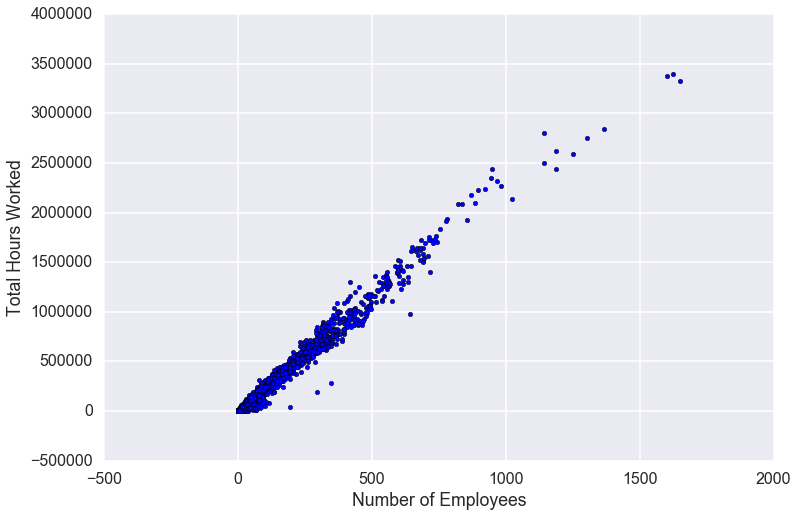

In [12]:
plt.scatter(df.Average_Employees, 
            df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked");

In [17]:
colors = sns.color_palette(n_colors=5)

In [18]:
color_dict = {key: value for key, value in zip(sorted(df.Year.unique()), colors)}

In [19]:
color_dict

{2008: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2009: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2010: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2011: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2012: (0.8, 0.7254901960784313, 0.4549019607843137)}

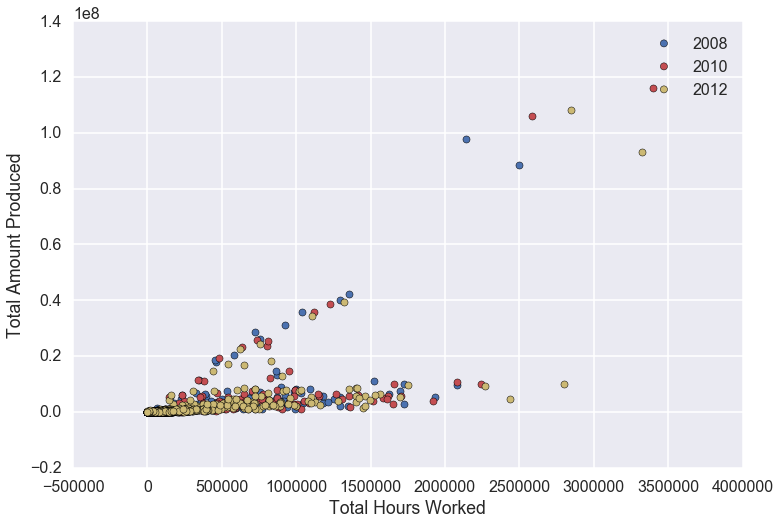

In [20]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
plt.savefig("ex1.png")

In [21]:
import matplotlib as mpl

In [22]:
mpl.style.use('bmh')

In [23]:
plt.style.available

['seaborn-muted',
 'seaborn-whitegrid',
 'seaborn-ticks',
 'classic',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-bright',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-talk',
 'seaborn-dark',
 'dark_background',
 'seaborn-deep',
 'seaborn-white',
 'seaborn-paper',
 'grayscale',
 'seaborn-notebook',
 'fivethirtyeight',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-pastel']

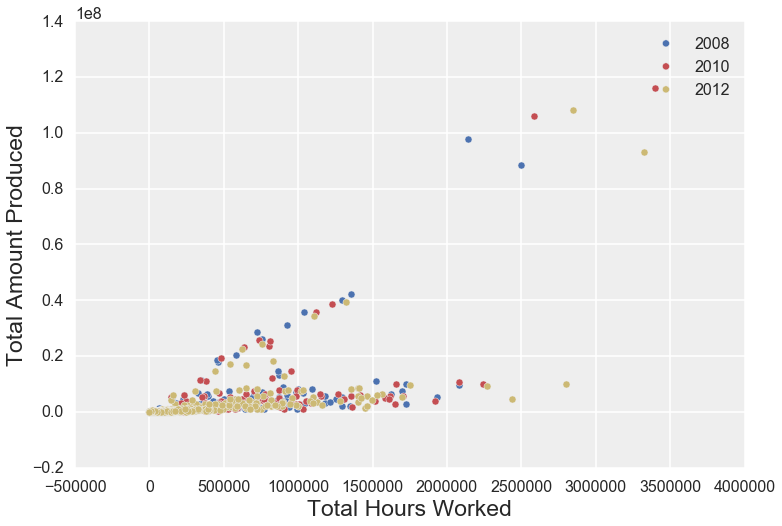

In [24]:
for year in sorted(df.Year.unique()[[0, 2, -1]]):
    plt.scatter(df[df.Year == year].Labor_Hours,
                df[df.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()
# plt.savefig("ex1.png")

In [25]:
df_dict = load_boston()
features = pd.DataFrame(data=df_dict.data, columns = df_dict.feature_names)
target = pd.DataFrame(data=df_dict.target, columns = ['MEDV'])
df = pd.concat([features, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


/Users/jonathan/miniconda3/envs/py3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


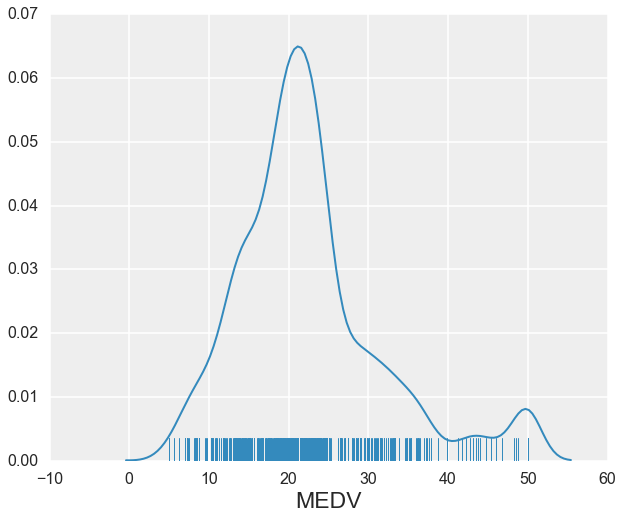

In [26]:
# Target variable
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df.MEDV, ax=ax, rug=True, hist=False)

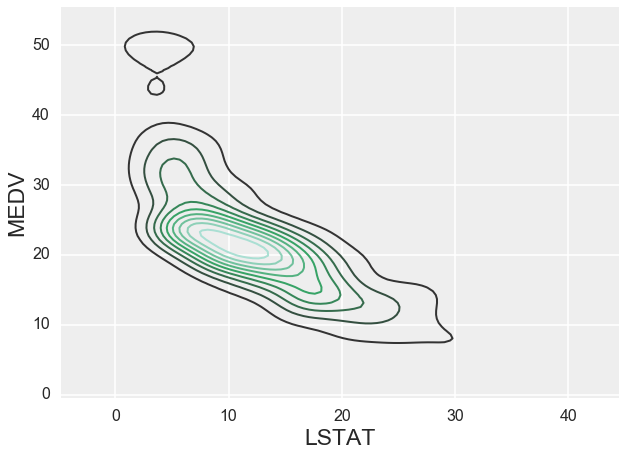

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.kdeplot(df.LSTAT,
            df.MEDV,
            ax=ax)

/Users/jonathan/miniconda3/envs/py3/lib/python3.5/site-packages/pandas/tools/plotting.py:3369: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "the passed axes is being cleared", UserWarning)


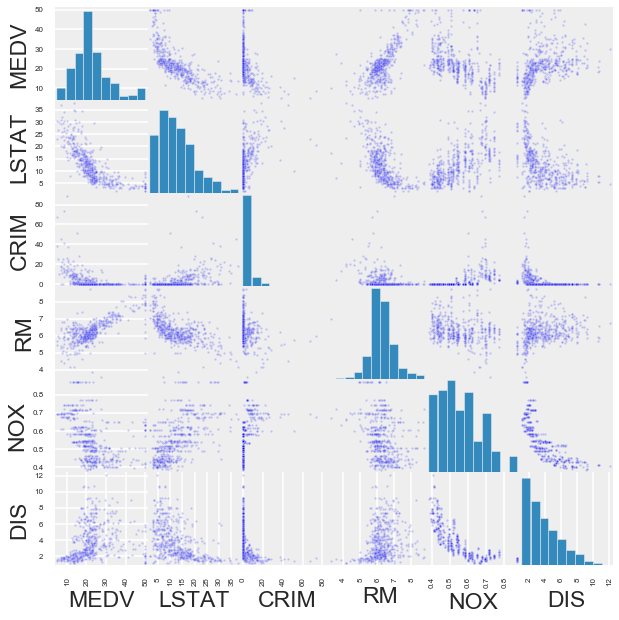

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
scatter_matrix(df[['MEDV', 'LSTAT', 'CRIM', 'RM', 'NOX', 'DIS']], alpha=0.2, diagonal='hist', ax=ax);